In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


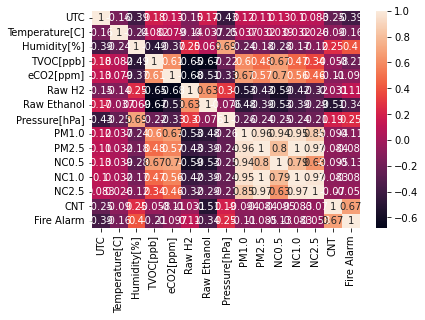

<Figure size 1080x720 with 0 Axes>

In [10]:
sns.heatmap(df.drop(columns=['Unnamed: 0'],axis=1).corr(),annot=True)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.show()

In [11]:
# check null 
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [12]:
df.dropna()
df.duplicated(keep= False)

0        False
1        False
2        False
3        False
4        False
         ...  
62625    False
62626    False
62627    False
62628    False
62629    False
Length: 62630, dtype: bool

In [13]:
# drop cột số thứ tự
df.drop(columns = ['Unnamed: 0','UTC'],axis = 1,inplace = True)
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [14]:
# tính covariance
def cov_value(x, y):
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))

    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]

    sum_value = sum([sub_y[i] * sub_x[i] for i in range(len(x))])
    denom = float(len(x) - 1)

    cov = sum_value / denom
    return cov


# tính corr theo công thức
def correlation(x, y):
    cov_x = cov_value(x, x)
    cov_y = cov_value(y, y)
    return cov_value(x, y) / np.sqrt(cov_x * cov_y)

In [15]:
x = df.drop(labels='Fire Alarm', axis =1)
y = df['Fire Alarm']
print(x)
print(y)

       Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0              20.000        57.36          0        400   12306        18520   
1              20.015        56.67          0        400   12345        18651   
2              20.029        55.96          0        400   12374        18764   
3              20.044        55.28          0        400   12390        18849   
4              20.059        54.69          0        400   12403        18921   
...               ...          ...        ...        ...     ...          ...   
62625          18.438        15.79        625        400   13723        20569   
62626          18.653        15.87        612        400   13731        20588   
62627          18.867        15.84        627        400   13725        20582   
62628          19.083        16.04        638        400   13712        20566   
62629          19.299        16.52        643        400   13696        20543   

       Pressure[hPa]  PM1.0

In [16]:

corr = {} 
for i in range (len(x.columns)):
  cur=[] 
  for j in range(len(x.columns)):
    cur.append(correlation(x.iloc[:,i],x.iloc[:,j])) 
  cur.append(correlation(x.iloc[:,i],y)) 
  corr[x.columns[i]] = cur

cur = [] 
for i in range(len(x.columns)):
  cur.append(correlation(x.iloc[:,i],y)) 
cur.append(correlation(y,y)) 
corr['Fire Alarm'] = cur

corr = pd.DataFrame(corr, columns = corr.keys(), index=corr.keys())

In [17]:
print(corr)

                Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
Temperature[C]        1.000000    -0.243986   0.082442   0.079265 -0.135540   
Humidity[%]          -0.243986     1.000000  -0.488878  -0.369095  0.247199   
TVOC[ppb]             0.082442    -0.488878   1.000000   0.606118 -0.653053   
eCO2[ppm]             0.079265    -0.369095   0.606118   1.000000 -0.682785   
Raw H2               -0.135540     0.247199  -0.653053  -0.682785  1.000000   
Raw Ethanol          -0.037343     0.068782  -0.673715  -0.506695  0.631495   
Pressure[hPa]        -0.251203     0.694614  -0.220004  -0.326043  0.303090   
PM1.0                 0.037330    -0.236538   0.597366   0.665482 -0.530714   
PM2.5                 0.032084    -0.178882   0.477424   0.572691 -0.431079   
NC0.5                 0.039291    -0.277389   0.670657   0.699604 -0.587769   
NC1.0                 0.031608    -0.174224   0.467386   0.564252 -0.422626   
NC2.5                 0.025526    -0.118502   0.3447

In [14]:
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [15]:
#ham split train test
def shuffle_split_data(X, y):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)
    #split = np.random.rand(X.shape[0]) < 0.7

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]
    return X_Train, y_Train, X_Test, y_Test

In [16]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [17]:
df.drop(columns = ['Unnamed: 0','UTC'],axis = 1,inplace = True)
df.drop(columns = ['NC1.0','PM1.0'],axis = 1,inplace =True)

In [18]:
X=df.drop(columns = ['Fire Alarm'])
y=df['Fire Alarm']
scale = MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x_train,y_train,x_test,y_test = shuffle_split_data(X_scaled,y)
print(x_train,y_train,x_test,y_test)

       Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
0            0.512692     0.723239   0.000000        0.0  0.522488   
2            0.513046     0.701520   0.000000        0.0  0.544179   
3            0.513229     0.690971   0.000000        0.0  0.549282   
4            0.513412     0.681818   0.000000        0.0  0.553429   
6            0.513766     0.665064   0.000000        0.0  0.562679   
...               ...          ...        ...        ...       ...   
62623        0.488431     0.078188   0.010833        0.0  0.968102   
62626        0.496253     0.079584   0.010200        0.0  0.977033   
62627        0.498865     0.079119   0.010450        0.0  0.975120   
62628        0.501501     0.082222   0.010633        0.0  0.970973   
62629        0.504137     0.089668   0.010717        0.0  0.965869   

       Raw Ethanol  Pressure[hPa]     PM2.5     NC0.5         NC2.5       CNT  
0         0.525685       0.986014  0.000000  0.000000  0.000000e+00  0.000000  

In [19]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
model=RandomForestClassifier()
#fit model
model.fit(x_train_smote, y_train_smote)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train_smote)
test_acc = accuracy_score(y_test,y_pred_test)
train_acc = accuracy_score(y_train_smote,y_pred_train)
print('test_acc: ', test_acc)
print('train_acc: ', train_acc)
print(pd.crosstab(y_test,y_pred_test))
print(classification_report(y_test, y_pred_test))

test_acc:  1.0
train_acc:  1.0
col_0          0      1
Fire Alarm             
0           5344      0
1              0  13445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5344
           1       1.00      1.00      1.00     13445

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [20]:
from __future__ import print_function
import numpy as np 

# đánh giá thuật toán
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    f = 2*((p*r)/(p+r))
    s = cm[1,1]/np.sum(cm[:,1])
    return (p, r,f,s)

# tính toán ConfusionMatrix
x = set(y_test)
y = len(x)

conf_matrix = pd.DataFrame(np.zeros((y, y),dtype=int),
                           index=x,
                           columns= x)

for true_label, prediction in zip(y_test ,y_pred_test): # thay đổi 2 tập này 
    conf_matrix.loc[true_label, prediction] += 1
    
# kết quả

p,r,f,s = cm2pr_binary(conf_matrix.to_numpy())
print("precition = {0:.2f}, recall = {1:.2f}, f1 = {2:.2f}, specificity = {3:.2f}".format(p, r,f,s))

precition = 1.00, recall = 1.00, f1 = 1.00, specificity = 1.00
